In [526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 80
pd.options.display.max_rows = 81

In [527]:
data = pd.read_csv('Train.csv')
data2 = pd.read_csv('Test.csv')

In [528]:
new_data = pd.concat([data,data2]).reset_index(drop=True)
new_data.shape

(80000, 52)

In [529]:
new_data.drop(['Applicant_ID'], axis =1, inplace = True)
data.drop(['Applicant_ID'], axis =1, inplace = True)
data2.drop(['Applicant_ID'], axis =1, inplace = True)


In [530]:
#new_data.drop(['form_field5', 'form_field10', 'form_field17', 
               #'form_field18', 'form_field20', 'form_field22', 
               #'form_field23', 'form_field26', 'form_field27', 
               #'form_field28', 'form_field29', 'form_field32', 
               #'form_field37', 'form_field39', 'form_field46', 'form_field49'], axis =1, inplace = True)
                
## Drop rows with much missing values > 70%
new_data.drop(["form_field40"], axis =1, inplace = True)
new_data.drop(["form_field31"], axis =1, inplace = True)
#new_data.drop(["form_field40","form_field41", 'form_field31','form_field45',"form_field11"], axis =1, inplace = True)


In [531]:
mat = new_data.corr()
upper_mat = mat.where(np.triu(np.ones(mat.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_mat.columns if any(upper_mat[column] > 0.8)]
print(to_drop)

['form_field10', 'form_field17', 'form_field18', 'form_field20', 'form_field23', 'form_field27', 'form_field37', 'form_field46']


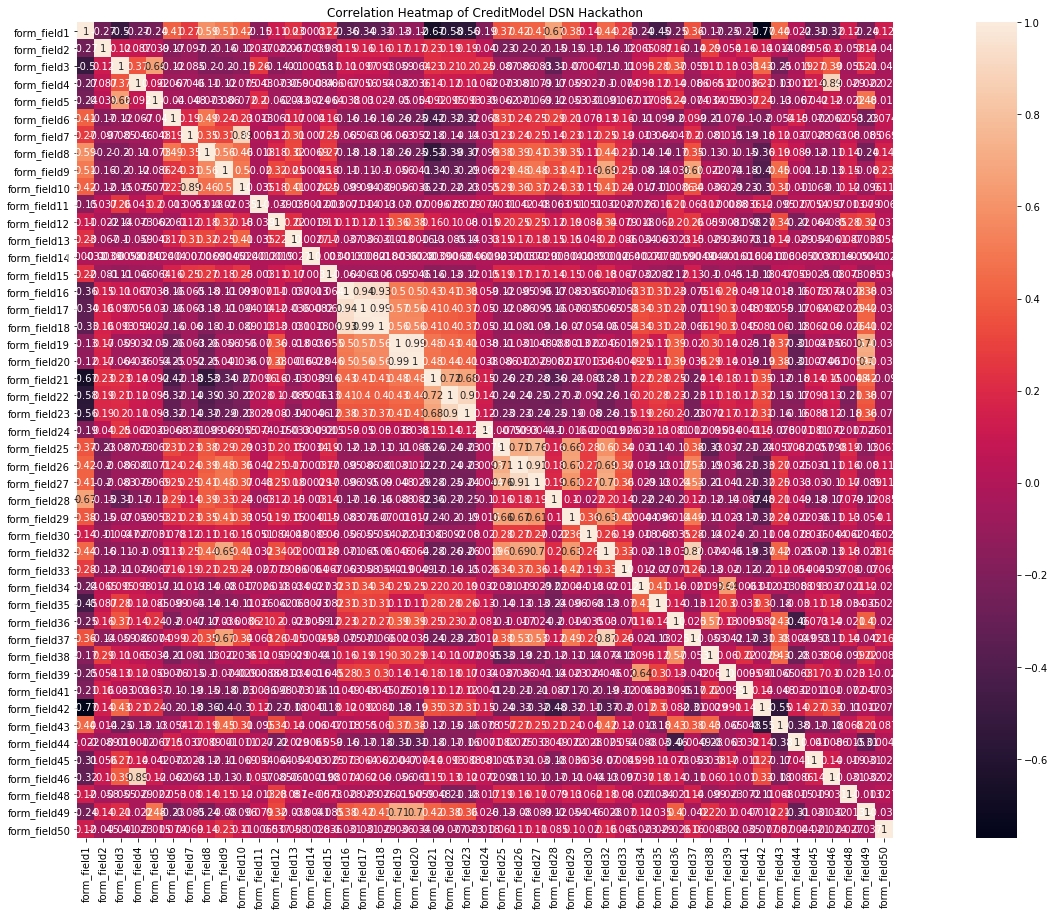

In [532]:
plt.figure(figsize=(30,15))
plt.title('Correlation Heatmap of CreditModel DSN Hackathon')
sns.heatmap(mat, square=True, annot=True, linecolor='black')          
plt.show() 

In [533]:
#pd.crosstab(new_data.form_field44, new_data.default_status)
#pd.crosstab(new_data.form_field5, new_data.default_status)

In [534]:
new_data['forma'] = new_data['form_field6'] + new_data['form_field7']+ new_data['form_field8']+ new_data['form_field9']+new_data['form_field12']
    
#new_data.drop(["form_field6","form_field7", 'form_field8','form_field12'], axis =1, inplace = True)

In [535]:
new_data['formb'] = new_data['form_field21'] + new_data['form_field24']+ new_data['form_field25']
#new_data.drop(["form_field21","form_field24", 'form_field25'], axis =1, inplace = True)

In [536]:
new_data['formc'] = new_data['form_field48'] + new_data['form_field50']
#new_data.drop(["form_field48"], axis =1, inplace = True)


new_data['formd'] = new_data['forma'] + new_data['formb'] + new_data['formc']

In [537]:
list1 = ['form_field2','form_field3','form_field4', 'form_field9',
        'form_field13','form_field16','form_field19','form_field34','form_field35',
        'form_field36','form_field38','form_field42']
for col in list1:
    #new_data[col].fillna(method = 'ffill', inplace = True)
    new_data[col].fillna(0, inplace = True)


In [538]:
list2 = ['forma','formb','formc','formd','form_field15','form_field33','form_field44']
for col in list2:
    #new_data[col].fillna(method = 'ffill', inplace = True)
    new_data[col].fillna(new_data[col].median(), inplace = True)

In [539]:
mcolumns = new_data.columns[new_data.isna().any()]
mcolumns = mcolumns[:-1]


for column in mcolumns:
    #new_data[col].fillna(method = 'ffill', inplace = True)
    new_data[column].fillna(-999, inplace = True)

In [540]:
new_data.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field32', 'form_field33',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field41', 'form_field42',
       'form_field43', 'form_field44', 'form_field45', 'form_field46',
       'form_field47', 'form_field48', 'form_field49', 'form_field50',
       'default_status', 'forma', 'formb', 'formc', 'formd'],
      dtype='object')

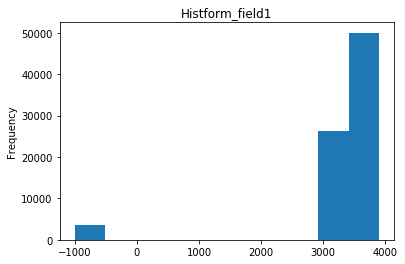

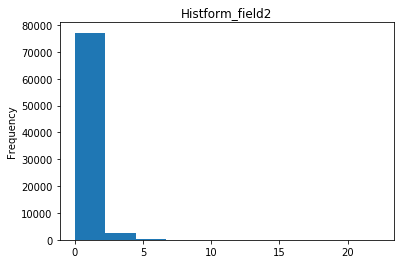

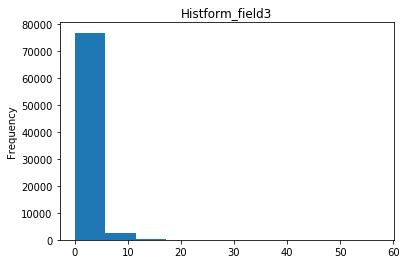

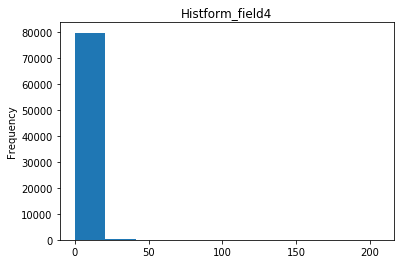

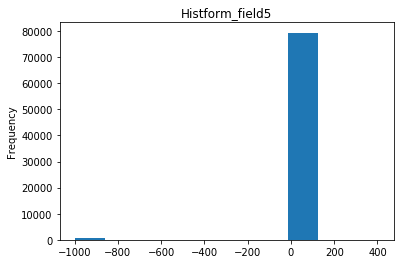

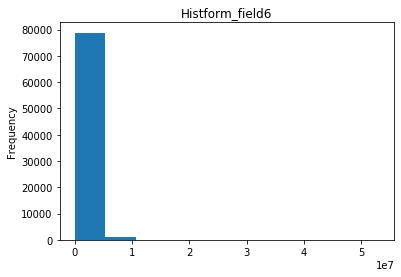

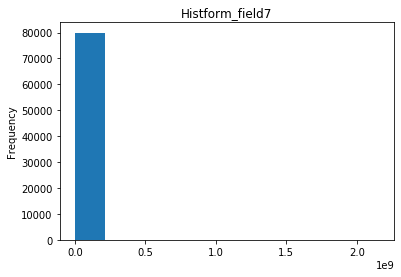

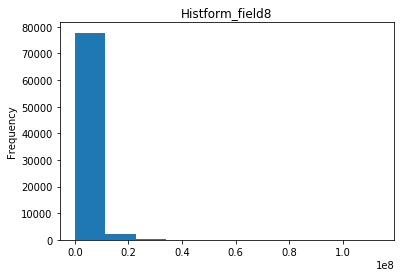

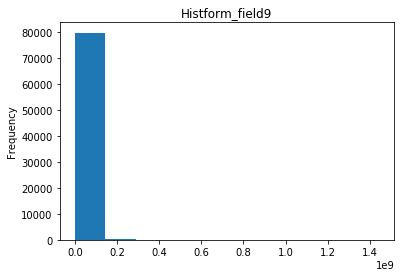

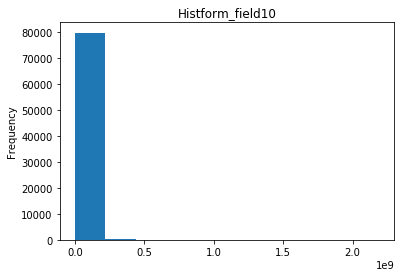

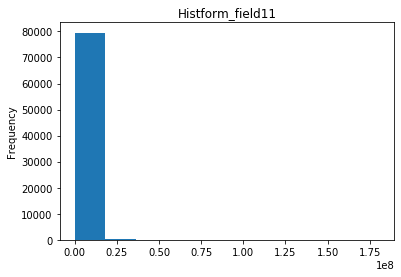

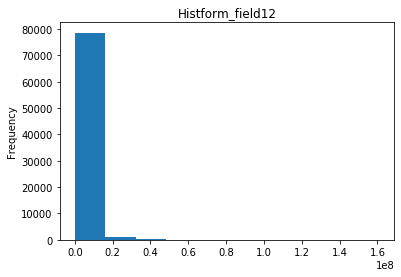

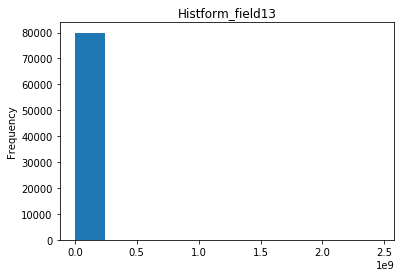

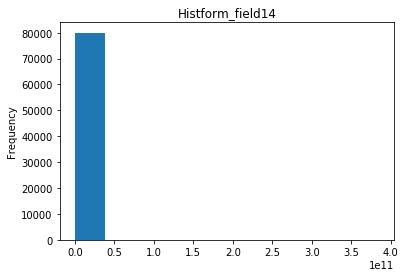

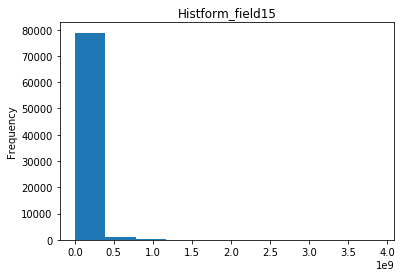

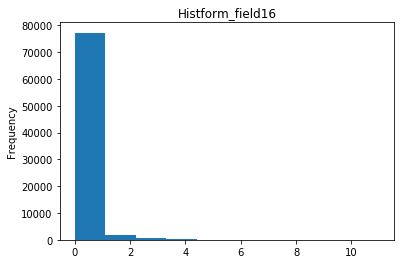

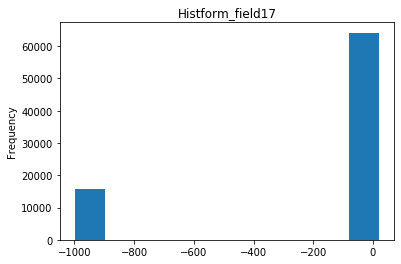

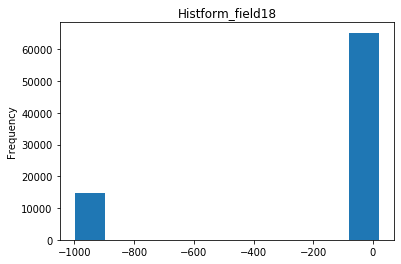

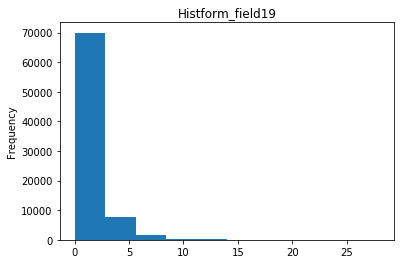

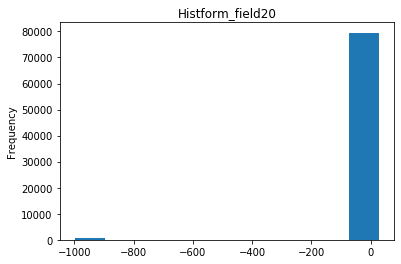

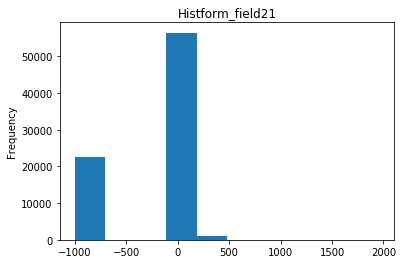

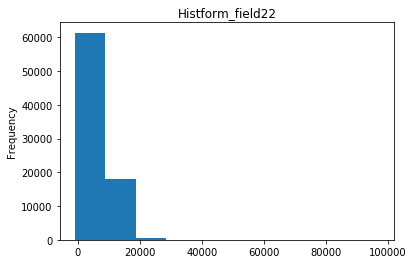

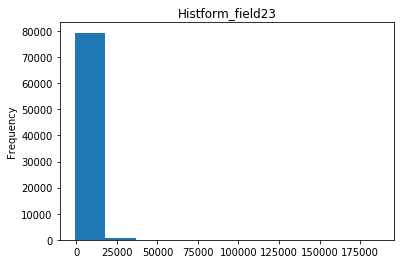

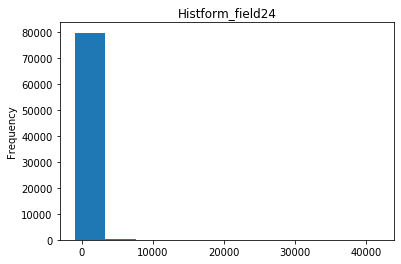

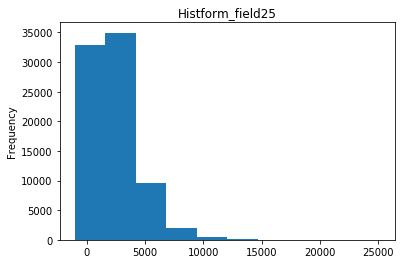

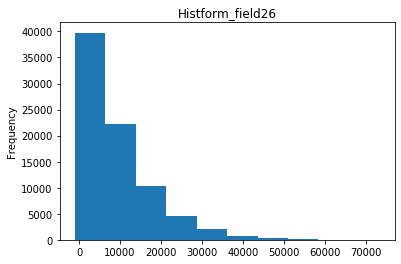

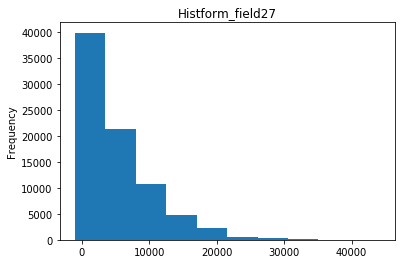

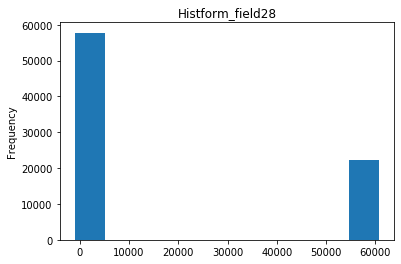

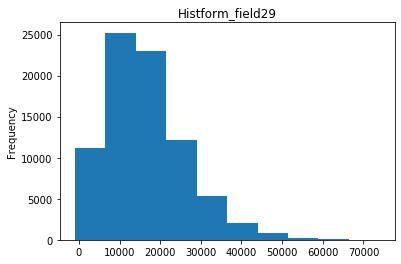

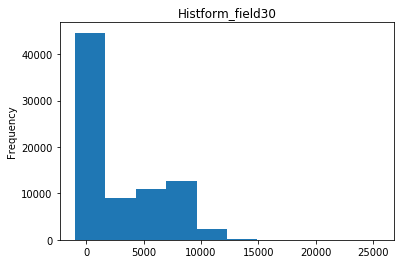

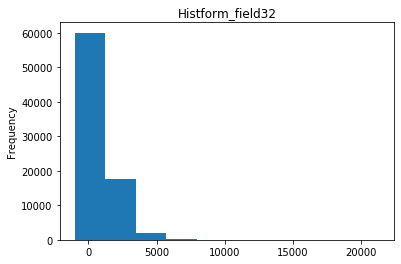

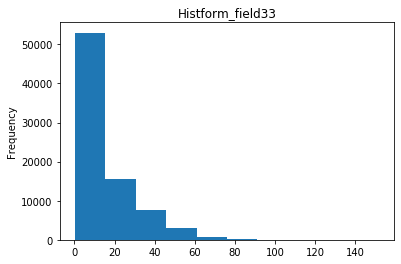

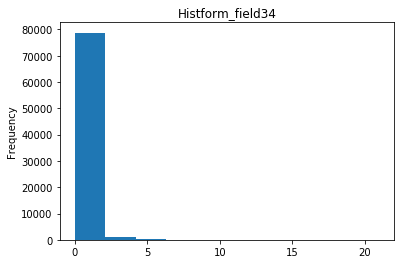

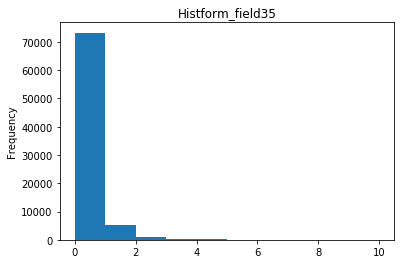

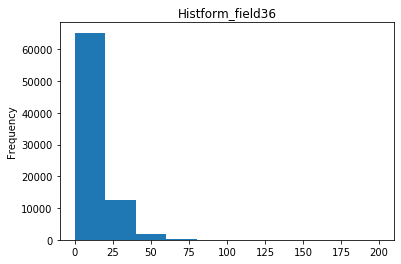

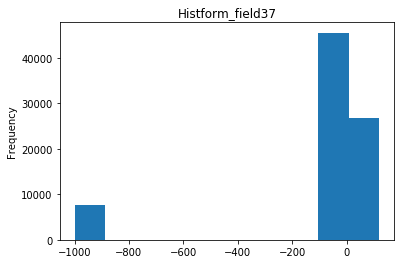

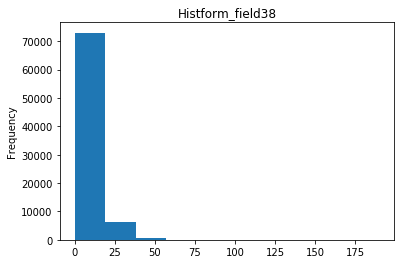

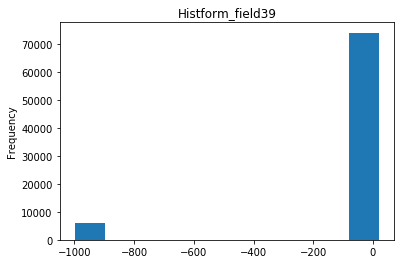

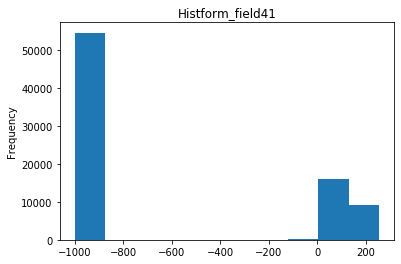

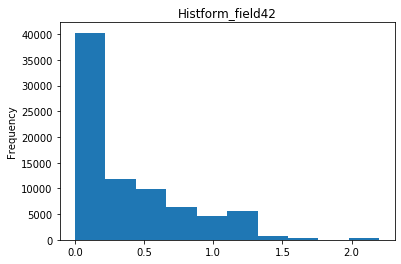

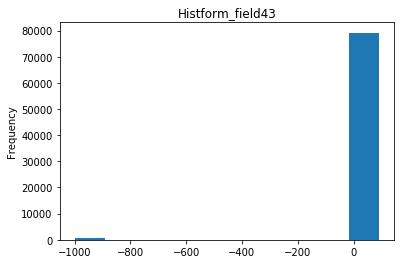

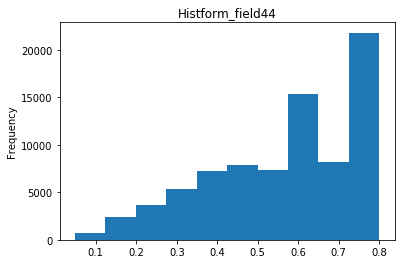

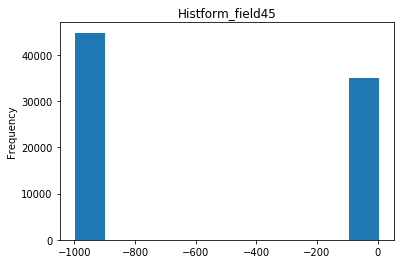

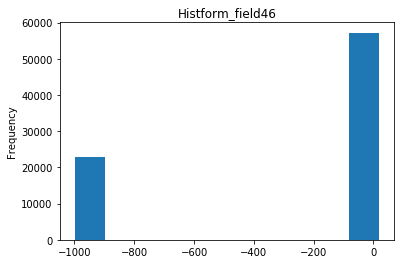

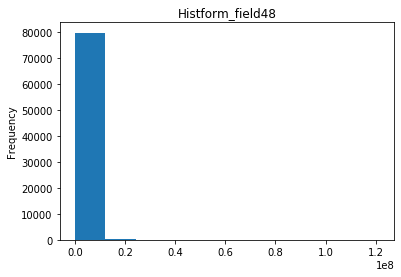

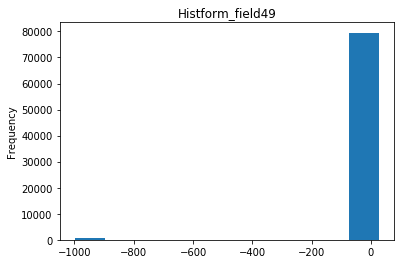

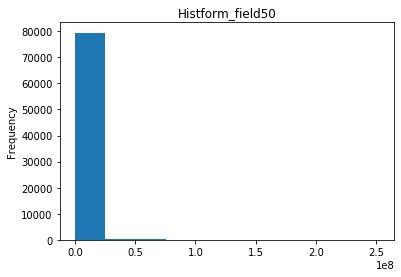

TypeError: no numeric data to plot

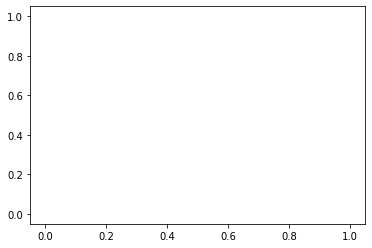

In [542]:
for col in new_data.drop(['form_field47'], axis =1).columns:
    plt.plot(figsize = (14,3))
    new_data[col].plot(kind='hist', title = 'Hist' + col)
    plt.show()

In [543]:
new_data.form_field47[new_data.form_field47 == 'charge'] = 1
new_data.form_field47[new_data.form_field47 == 'lending'] = 0
new_data.form_field47 = new_data.form_field47.astype(int)

In [544]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import preprocessing
sc = StandardScaledata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZYAAAEICAYAAAB8lNKlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAdkklEQVR4nO3dfZRdVZ3m8e8DAXlRTIBAYxIMaFpBl7yVEAfHUYIQQAmugTGMNmma6dgaR51xpg2unkZB1pK1bBG6bewokYRWQkSRqGCMEbTt4a0Q5FUmJSCpDpJoEl4FDD7zx9nVXItbVbeqzs3lJs9nrbvOOb+zzzl7yzW/Onvvc65sExERUZcdOl2BiIjYtiSxRERErZJYIiKiVkksERFRqySWiIioVRJLRETUKoklIiJqlcQS2yVJ90h6+xiP/Yyk30j6dc3VGm093iNpraQnJR3WapskTZdkSROG2P8pSf9ce4Vju5HEEtskSQ9JOnZQ7M8l/RTA9hts3zDCOV70D7CkacDHgYNt/0kbqj4anwM+bPvltm9vpU2jJWlvSf8q6beSNku6UdLRdV4jtj1N/2KJiCG9Gvit7fWjPVDSBNtbaq7LPTWer5kngb8A1gAG5gDfkbRPzW2JbUjuWGK71HhHI+lISb2SHpf0qKTPl2I/KcvNpbvp/wCrgFeV7cvK8SeXbqjNkm6QdNCg63xC0p3AU5ImlNj/lnSnpKckXSppX0nXSXpC0g8lTRqm7i+T9CSwI/BzSb9s0qYdJC2U9Mtyt7Fc0p5DnO8AST8u114F7D2wz/Yztu+3/QdAwPPAJKDpuSIgiSUC4CLgItt7AK8Blpf428pyYuluOg84AVhXtv9c0p8CVwAfAyYD11L9Rb9zw/lPB04q5xn4K/8/A+8E/hR4N3Ad8Emqf9R3AD4yVGVtP2v75WXzENuvaVLsI8ApwH8CXgVsAr44xCm/DtxWrn0eMG9wgZIYnwFWAF8Zyx1bbD/SFRbbsm9Lauyu2Rn4WZNyvwdeK2lv278BbhrFNd4LfM/2KgBJnwM+CvwH4IZS5mLbawcd9/e2Hy3H/Auw3vbtZftqYNYo6tDMB6jGX/rLOT8FPCzpzxoLSdofeDNwrO1ngZ9I+s7gk9l+k6RdgPdQ/e8YMaTcscS27BTbEwc+wIeGKHcW1Z3DLyTdKuldo7jGq4BfDWyULqO1wJSGMoOTCsCjDeu/a7L9csbn1cDVpXtuM3AfVTfWvoPKvQrYZPuphtivaKJ0i10BLJR0yDjrF9uwJJbY7tleY/t0YB/gAuAqSbtTDVaPZB3VP+IASBIwDfi3xkvUWN1WrQVOaEystnex/W+Dyj0CTCrtHbD/COfeCTiwzsrGtiWJJbZ7kt4vaXK529hcws8DG4A/MPw/osuBkyTNkrQT1VTkZ4H/2846t+BLwPmSXg0gabKkOYML2f4V0At8WtLOkt5KNeZDOW6mpLeWfbtK+gTVXc/NW6cZ0Y0yxhIBs4HPS9qNqhtoru1nACSdD/xrSRqzBx9o+35J7wf+nqr76w7g3baf22q1b+4iqllcP5D0KmA9cCVwTZOy/xVYAmwEbgSWAhPLvpcBF1Ml198DdwEn2V7X1tpHV1N+QTIiIuqUrrCIiKhVEkvES5Sk95UHMQd/2v20fcS4tDWxSPof5YnkuyVdIWmX8pTvzZLWSLpy4EGy8jTxlZL6yv7pDec5u8Tvl3R8Q3x2ifVJWtjOtkRsbba/Vh7EHPx5Q6frFjGcto2xSJoC/JTqZX2/k7Sc6qnkE4Fv2V4m6UvAz21fIulDwJts/5WkucB7bL9X0sFUTzYfSTXn/odUzxwA/D+qp5f7gVuB023fO1y99t57b0+fPr329kZEbKtuu+2239ie3Gr5ds8KmwDsKun3wG5Uc+aPoZqFAtVMlE8Bl1C93O5TJX4V8A/lmYA5wLLyVPCDkvqokgxAn+0HACQtK2WHTSzTp0+nt7e3lsZFRGwPJDV9aHYobesKKw9ifQ54mCqhPEb1PqLNDe9L6ueFJ5SnUJ5QLvsfA/ZqjA86Zqj4i0iar+olg70bNmwYf+MiImJIbUss5e2sc4ADqLqwdqd6gd9gA31xGmLfaOMvDtqLbPfY7pk8ueW7uYiIGIN2Dt4fCzxoe4Pt3wPfonox30S98MNJU6leiQHVHcc0qH63Angl1QNb/x4fdMxQ8YiI6KB2JpaHgZmSditjJbOoxj+uB04tZebxwpPAK3jhdd2nAj9yNbNgBTC3zBo7AJgB3EI1WD+jzDLbGZhbykZERAe1bfDe9s2SrqJ6TfkW4HZgEfA9YJmkz5TYpeWQS4HLy+D8RqpEge17yoyye8t5Fth+HkDSh4GVVD94tNh25vdHRHTYdvdKl56eHmdWWERE6yTdZrun1fJ58j4iImqVxBIREbVKYomIiFrl91hGYfrC73Xkug999qSOXDciYixyxxIREbVKYomIiFolsURERK2SWCIiolZJLBERUaskloiIqFUSS0RE1CqJJSIiapXEEhERtUpiiYiIWiWxRERErZJYIiKiVkksERFRqySWiIioVdsSi6TXSbqj4fO4pI9J2lPSKklrynJSKS9JF0vqk3SnpMMbzjWvlF8jaV5D/AhJd5VjLpakdrUnIiJa07bEYvt+24faPhQ4AngauBpYCKy2PQNYXbYBTgBmlM984BIASXsC5wBHAUcC5wwko1JmfsNxs9vVnoiIaM3W6gqbBfzS9q+AOcCSEl8CnFLW5wBLXbkJmChpP+B4YJXtjbY3AauA2WXfHrZvtG1gacO5IiKiQ7ZWYpkLXFHW97X9CEBZ7lPiU4C1Dcf0l9hw8f4m8ReRNF9Sr6TeDRs2jLMpERExnLYnFkk7AycD3xipaJOYxxB/cdBeZLvHds/kyZNHqEZERIzH1rhjOQH4me1Hy/ajpRuLslxf4v3AtIbjpgLrRohPbRKPiIgO2hqJ5XRe6AYDWAEMzOyaB1zTED+jzA6bCTxWuspWAsdJmlQG7Y8DVpZ9T0iaWWaDndFwroiI6JAJ7Ty5pN2AdwIfaAh/Flgu6SzgYeC0Er8WOBHoo5pBdiaA7Y2SzgNuLeXOtb2xrH8QuAzYFbiufCIiooPamlhsPw3sNSj2W6pZYoPLGlgwxHkWA4ubxHuBN9ZS2YiIqEWevI+IiFolsURERK2SWCIiolZJLBERUaskloiIqFUSS0RE1CqJJSIiapXEEhERtUpiiYiIWiWxRERErZJYIiKiVkksERFRqySWiIioVRJLRETUKoklIiJqlcQSERG1SmKJiIhaJbFERESt2ppYJE2UdJWkX0i6T9JbJO0paZWkNWU5qZSVpIsl9Um6U9LhDeeZV8qvkTSvIX6EpLvKMRdLUjvbExERI2v3HctFwPdtvx44BLgPWAistj0DWF22AU4AZpTPfOASAEl7AucARwFHAucMJKNSZn7DcbPb3J6IiBhB2xKLpD2AtwGXAth+zvZmYA6wpBRbApxS1ucAS125CZgoaT/geGCV7Y22NwGrgNll3x62b7RtYGnDuSIiokPaecdyILAB+Kqk2yV9RdLuwL62HwEoy31K+SnA2obj+0tsuHh/k/iLSJovqVdS74YNG8bfsoiIGFI7E8sE4HDgEtuHAU/xQrdXM83GRzyG+IuD9iLbPbZ7Jk+ePHytIyJiXNqZWPqBfts3l+2rqBLNo6Ubi7Jc31B+WsPxU4F1I8SnNolHREQHtS2x2P41sFbS60poFnAvsAIYmNk1D7imrK8Aziizw2YCj5WuspXAcZImlUH744CVZd8TkmaW2WBnNJwrIiI6ZEKbz//fga9J2hl4ADiTKpktl3QW8DBwWil7LXAi0Ac8Xcpie6Ok84BbS7lzbW8s6x8ELgN2Ba4rn4iI6KC2JhbbdwA9TXbNalLWwIIhzrMYWNwk3gu8cZzVjIiIGuXJ+4iIqFUSS0RE1CqJJSIiapXEEhERtUpiiYiIWiWxRERErZJYIiKiVkksERFRqySWiIioVRJLRETUKoklIiJqlcQSERG1SmKJiIhaJbFEREStklgiIqJWSSwREVGrJJaIiKhVEktERNSqrYlF0kOS7pJ0h6TeEttT0ipJa8pyUolL0sWS+iTdKenwhvPMK+XXSJrXED+inL+vHKt2ticiIka2Ne5Y3mH7UNs9ZXshsNr2DGB12QY4AZhRPvOBS6BKRMA5wFHAkcA5A8molJnfcNzs9jcnIiKG04musDnAkrK+BDilIb7UlZuAiZL2A44HVtneaHsTsAqYXfbtYftG2waWNpwrIiI6pN2JxcAPJN0maX6J7Wv7EYCy3KfEpwBrG47tL7Hh4v1N4i8iab6kXkm9GzZsGGeTIiJiOBPafP6jba+TtA+wStIvhinbbHzEY4i/OGgvAhYB9PT0NC0TERH1aOmORdIbx3Jy2+vKcj1wNdUYyaOlG4uyXF+K9wPTGg6fCqwbIT61STwiIjqo1a6wL0m6RdKHJE1s5QBJu0t6xcA6cBxwN7ACGJjZNQ+4pqyvAM4os8NmAo+VrrKVwHGSJpVB++OAlWXfE5JmltlgZzScKyIiOqSlrjDbb5U0A/gLoFfSLcBXba8a5rB9gavLDOAJwNdtf1/SrcBySWcBDwOnlfLXAicCfcDTwJnl2hslnQfcWsqda3tjWf8gcBmwK3Bd+URERAe1PMZie42kvwF6gYuBw8qdwidtf6tJ+QeAQ5rEfwvMahI3sGCIay8GFjeJ9wJj6qaLiIj2aHWM5U2SLgTuA44B3m37oLJ+YRvrFxERXabVO5Z/AL5MdXfyu4FgmfH1N22pWUREdKVWE8uJwO9sPw8gaQdgF9tP2768bbWLiIiu0+qssB9SDZAP2K3EIiIi/kiriWUX208ObJT13dpTpYiI6GatJpanBr1t+Ajgd8OUj4iI7VSrYywfA74haeDJ9v2A97anShER0c1afUDyVkmvB15H9Y6uX9j+fVtrFhERXWk0L6F8MzC9HHOYJGwvbUutIiKia7WUWCRdDrwGuAN4voQHfgMlIiLi37V6x9IDHFxeuxIRETGkVmeF3Q38STsrEhER24ZW71j2Bu4tbzV+diBo++S21CoiIrpWq4nlU+2sREREbDtanW78Y0mvBmbY/qGk3YAd21u1iIjoRq2+Nv8vgauAfyqhKcC321WpiIjoXq0O3i8AjgYeh+pHv4B92lWpiIjoXq0mlmdtPzewIWkC1XMsERERf6TVxPJjSZ8EdpX0TuAbwHdaOVDSjpJul/Tdsn2ApJslrZF0paSdS/xlZbuv7J/ecI6zS/x+Scc3xGeXWJ+khS22JSIi2qjVxLIQ2ADcBXwAuBZo9ZcjP0r1k8YDLgAutD0D2AScVeJnAZtsv5bq544vAJB0MDAXeAMwG/jHkqx2BL4InAAcDJxeykZERAe1lFhs/8H2l22fZvvUsj5iV5ikqcBJwFfKtoBjqCYCACwBTinrc8o2Zf+sUn4OsMz2s7YfBPqAI8unz/YDpZtuWSkbEREd1Oq7wh6kyZiK7QNHOPQLwF8DryjbewGbbW8p2/1UM8woy7XlvFskPVbKTwFuajhn4zFrB8WPGqL+84H5APvvv/8IVY6IiPEYzbvCBuwCnAbsOdwBkt4FrLd9m6S3D4SbFPUI+4aKN7vbanoXZXsRsAigp6cnkw4iItqo1Qckfzso9AVJPwX+dpjDjgZOlnQiVTLag+oOZqKkCeWuZSow8ONh/cA0oL/MOnslsLEhPqDxmKHiERHRIa0+IHl4w6dH0l/xQvdWU7bPtj3V9nSqwfcf2X4fcD1waik2D7imrK8o25T9PyrjOCuAuWXW2AHADOAW4FZgRplltnO5xorWmh0REe3SalfY3zWsbwEeAv7LGK/5CWCZpM8AtwOXlvilwOWS+qjuVOYC2L5H0nLg3nLtBbafB5D0YWAl1etlFtu+Z4x1ioiImrTaFfaO8VzE9g3ADWX9AaoZXYPLPEM1dtPs+POB85vEr6Wa+hwRES8Rrc4K+5/D7bf9+XqqExER3W40s8LezAtjGO8GfsIfT/eNiIgY1Q99HW77CQBJnwK+Yfu/tatiERHRnVp9pcv+wHMN288B02uvTUREdL1W71guB26RdDXVQ4jvAZa2rVYREdG1Wp0Vdr6k64D/WEJn2r69fdWKiIhu1WpXGMBuwOO2L6J6Ov6ANtUpIiK6WKtP3p9D9WDj2SW0E/DP7apURER0r1bvWN4DnAw8BWB7HSO80iUiIrZPrSaW58p7uwwgaff2VSkiIrpZq4lluaR/onoz8V8CPwS+3L5qRUREt2p1Vtjnym/dPw68Dvhb26vaWrOIiOhKIyaW8tvyK20fCySZRETEsEbsCiuvqH9a0iu3Qn0iIqLLtfrk/TPAXZJWUWaGAdj+SFtqFRERXavVxPK98omIiBjWsIlF0v62H7a9ZGtVKCIiuttIYyzfHliR9M021yUiIrYBIyUWNawfOJoTS9pF0i2Sfi7pHkmfLvEDJN0saY2kKyXtXOIvK9t9Zf/0hnOdXeL3Szq+IT67xPokLRxN/SIioj1GSiweYr0VzwLH2D4EOBSYLWkmcAFwoe0ZwCbgrFL+LGCT7dcCF5ZySDoYmAu8AZgN/KOkHcs06C8CJwAHA6eXshER0UEjJZZDJD0u6QngTWX9cUlPSHp8uANdebJs7lQ+Bo4BrirxJcApZX1O2absnyVJJb7M9rO2HwT6gCPLp8/2A7afA5aVshER0UHDDt7b3nE8Jy93FbcBr6W6u/glsNn2llKkH5hS1qcAa8t1t0h6DNirxG9qOG3jMWsHxY8aoh7zgfkA+++//3iaFBERIxjN77GMmu3nbR8KTKW6wzioWbGy1BD7RhtvVo9Ftnts90yePHnkikdExJi1NbEMsL0ZuAGYSfUiy4E7panAurLeD0wDKPtfCWxsjA86Zqh4RER0UNsSi6TJkiaW9V2BY4H7gOuBU0uxecA1ZX1F2abs/1F5Vf8KYG6ZNXYAMAO4BbgVmFFmme1MNcC/ol3tiYiI1rT65P1Y7AcsKeMsOwDLbX9X0r3AMkmfAW4HLi3lLwUul9RHdacyF8D2PZKWA/cCW4AF5f1lSPowsBLYEVhs+542ticiIlrQtsRi+07gsCbxB6jGWwbHnwFOG+Jc5wPnN4lfC1w77spGRERttsoYS0REbD+SWCIiolZJLBERUaskloiIqFUSS0RE1CqJJSIiapXEEhERtUpiiYiIWiWxRERErZJYIiKiVkksERFRqySWiIioVRJLRETUKoklIiJqlcQSERG1SmKJiIhaJbFEREStklgiIqJWbUsskqZJul7SfZLukfTREt9T0ipJa8pyUolL0sWS+iTdKenwhnPNK+XXSJrXED9C0l3lmIslqV3tiYiI1rTzjmUL8HHbBwEzgQWSDgYWAqttzwBWl22AE4AZ5TMfuASqRAScAxwFHAmcM5CMSpn5DcfNbmN7IiKiBW1LLLYfsf2zsv4EcB8wBZgDLCnFlgCnlPU5wFJXbgImStoPOB5YZXuj7U3AKmB22beH7RttG1jacK6IiOiQrTLGImk6cBhwM7Cv7UegSj7APqXYFGBtw2H9JTZcvL9JvNn150vqldS7YcOG8TYnIiKG0fbEIunlwDeBj9l+fLiiTWIeQ/zFQXuR7R7bPZMnTx6pyhERMQ5tTSySdqJKKl+z/a0SfrR0Y1GW60u8H5jWcPhUYN0I8alN4hER0UHtnBUm4FLgPtufb9i1AhiY2TUPuKYhfkaZHTYTeKx0la0EjpM0qQzaHwesLPuekDSzXOuMhnNFRESHTGjjuY8G/gy4S9IdJfZJ4LPAcklnAQ8Dp5V91wInAn3A08CZALY3SjoPuLWUO9f2xrL+QeAyYFfguvKJiIgOaltisf1Tmo+DAMxqUt7AgiHOtRhY3CTeC7xxHNWMiIia5cn7iIioVRJLRETUKoklIiJqlcQSERG1SmKJiIhaJbFEREStklgiIqJWSSwREVGrJJaIiKhVEktERNQqiSUiImqVxBIREbVKYomIiFolsURERK2SWCIiolZJLBERUaskloiIqFUSS0RE1KptiUXSYknrJd3dENtT0ipJa8pyUolL0sWS+iTdKenwhmPmlfJrJM1riB8h6a5yzMWShvoZ5IiI2IraecdyGTB7UGwhsNr2DGB12QY4AZhRPvOBS6BKRMA5wFHAkcA5A8molJnfcNzga0VERAe0LbHY/gmwcVB4DrCkrC8BTmmIL3XlJmCipP2A44FVtjfa3gSsAmaXfXvYvtG2gaUN54qIiA7a2mMs+9p+BKAs9ynxKcDahnL9JTZcvL9JvClJ8yX1SurdsGHDuBsRERFDe6kM3jcbH/EY4k3ZXmS7x3bP5MmTx1jFiIhoxdZOLI+WbizKcn2J9wPTGspNBdaNEJ/aJB4RER22tRPLCmBgZtc84JqG+BlldthM4LHSVbYSOE7SpDJofxywsux7QtLMMhvsjIZzRUREB01o14klXQG8HdhbUj/V7K7PAsslnQU8DJxWil8LnAj0AU8DZwLY3ijpPODWUu5c2wMTAj5INfNsV+C68omIiA5rW2KxffoQu2Y1KWtgwRDnWQwsbhLvBd44njpGRET9XiqD9xERsY1IYomIiFolsURERK2SWCIiolZJLBERUaskloiIqFUSS0RE1CqJJSIiapXEEhERtUpiiYiIWiWxRERErZJYIiKiVkksERFRqySWiIioVdtemx/1mb7wex279kOfPalj146I7pQ7loiIqFUSS0RE1CqJJSIiatX1iUXSbEn3S+qTtLDT9YmI2N51dWKRtCPwReAE4GDgdEkHd7ZWERHbt26fFXYk0Gf7AQBJy4A5wL0drdU2pFMz0jIbLaJ7dXtimQKsbdjuB44aXEjSfGB+2XxS0v1jvN7ewG/GeOxL1UuyTbpgXIe/JNs0TmlTd9hW2/Tq0RzQ7YlFTWJ+UcBeBCwa98WkXts94z3PS0na1B3Spu6wDbdp+miO6eoxFqo7lGkN21OBdR2qS0RE0P2J5VZghqQDJO0MzAVWdLhOERHbta7uCrO9RdKHgZXAjsBi2/e08ZLj7k57CUqbukPa1B3SJkD2i4YkIiIixqzbu8IiIuIlJoklIiJqlcTSgm3ltTGSFktaL+nuhtieklZJWlOWkzpZx9GQNE3S9ZLuk3SPpI+WeDe3aRdJt0j6eWnTp0v8AEk3lzZdWSardBVJO0q6XdJ3y/a20KaHJN0l6Q5JvSXWtd8/AEkTJV0l6Rfl/1tvGW2bklhGsI29NuYyYPag2EJgte0ZwOqy3S22AB+3fRAwE1hQ/tt0c5ueBY6xfQhwKDBb0kzgAuDC0qZNwFkdrONYfRS4r2F7W2gTwDtsH9rw/Eo3f/8ALgK+b/v1wCFU/81G1ybb+QzzAd4CrGzYPhs4u9P1Gkd7pgN3N2zfD+xX1vcD7u90HcfRtmuAd24rbQJ2A35G9TaJ3wATSvyPvpPd8KF6xmw1cAzwXaqHm7u6TaXeDwF7D4p17fcP2AN4kDKxa6xtyh3LyJq9NmZKh+rSDvvafgSgLPfpcH3GRNJ04DDgZrq8TaXL6A5gPbAK+CWw2faWUqQbv4NfAP4a+EPZ3ovubxNUb/r4gaTbyqujoLu/fwcCG4Cvlm7Lr0janVG2KYllZC29NiY6R9LLgW8CH7P9eKfrM162n7d9KNVf+UcCBzUrtnVrNXaS3gWst31bY7hJ0a5pU4OjbR9O1VW+QNLbOl2hcZoAHA5cYvsw4CnG0JWXxDKybf21MY9K2g+gLNd3uD6jImknqqTyNdvfKuGubtMA25uBG6jGjyZKGnigudu+g0cDJ0t6CFhG1R32Bbq7TQDYXleW64Grqf4Q6ObvXz/Qb/vmsn0VVaIZVZuSWEa2rb82ZgUwr6zPoxqn6AqSBFwK3Gf78w27urlNkyVNLOu7AsdSDZ5eD5xainVVm2yfbXuqqxcZzgV+ZPt9dHGbACTtLukVA+vAccDddPH3z/avgbWSXldCs6h+hmRUbcqT9y2QdCLVX1gDr405v8NVGhNJVwBvp3oN9qPAOcC3geXA/sDDwGm2N3aqjqMh6a3AvwB38ULf/Sepxlm6tU1vApZQfdd2AJbbPlfSgVR/7e8J3A683/aznavp2Eh6O/C/bL+r29tU6n912ZwAfN32+ZL2oku/fwCSDgW+AuwMPACcSfku0mKbklgiIqJW6QqLiIhaJbFEREStklgiIqJWSSwREVGrJJaIiKhVEktERNQqiSUiImr1/wFuqOc2VWYo9wAAAABJRU5ErkJggg==r()
ms = MinMaxScaler()

In [545]:
from sklearn.model_selection import train_test_split
train = new_data[0:56000]
test = new_data[56000:]
train.default_status[train.default_status == 'no'] = 0
train.default_status[train.default_status == 'yes'] = 1
train['default_status'] = train['default_status'].astype(int)

In [565]:
X = train
y = train['default_status']
#X= preprocessing.scale(X)
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X = SelectKBest(chi2, k=18).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=19)

In [575]:
test.drop(['default_status'], axis =1 , inplace = True)

In [547]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [548]:
## using stratified KFold

In [549]:
#feat = train.columns
#features = train.columns
from sklearn.model_selection import StratifiedKFold

In [577]:



seed = 2020

parameters = {
    'n_estimators': 2000,
    'learning_rate': 0.002,
    'loss_function': 'CrossEntropy',
    'max_depth': 15,
    #'task_type':'GPU',
    'eval_metric':'AUC',
    'random_seed': seed,
    'early_stopping_rounds': 300,
    'use_best_model': True,
}

In [579]:
fold_score = 0
test_pred = []

n = 8
kf = StratifiedKFold(n)

for train_index, test_index in kf.split(X, y):
    Xtrain, Xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    model = CatBoostClassifier(**parameters)
    model.fit(Xtrain, ytrain, eval_set=[(Xtest,ytest)], verbose=200)
    
    pred = model.predict_proba(Xtest)[:, 1]
    score = metric(ytest, pred)
    fold_score = fold_score + (score/n)
    print(fold_score)
    
    predictions = model.predict_proba(test)[:, 1]
    test_pred.append(predictions)

KeyboardInterrupt: 

In [502]:
dt = pd.read_csv('Test.csv')
output = pd.DataFrame({'Applicant_ID' : dt['Applicant_ID'], "default_status": np.mean(test_pred)})

NameError: name 'test_pred' is not defined

In [ ]:
## Averaging/Weighted Averaging of best submissions

In [435]:
dat1 = pd.read_csv('S1.csv')
dat2 = pd.read_csv('S2.csv')
dat3 = pd.read_csv('S4.csv')
dat4 = pd.read_csv('S3.csv')


dat5 = pd.read_csv('10C_MODELcrossVal.csv')
dat6 = pd.read_csv('Final5.csv')

dat6 = pd.read_csv('Finalllo.csv')
dat7 = pd.read_csv('Finalllimm.csv')
dat8 = pd.read_csv('Finalllii.csv')
dat9 = pd.read_csv('FL.csv')
dat10 = pd.read_csv('FL2.csv')

In [436]:
datt = (dat2['default_status'] + dat6['default_status']+dat7['default_status'] + dat8['default_status']+dat9['default_status']+dat10['default_status'])/6
#datt = (dat1['default_status'] + dat2['default_status'] + dat3['default_status'])/3
#datt = 0.4*(dat2['default_status']) + 0.3*(dat3['default_status']) + 0.3*(dat1['default_status'])

In [437]:
df = pd.read_csv('SampleSubmission.csv')
df['default_status'] = datt
df.to_csv('FL3.csv', index = False)

In [438]:
df.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.314835
1,Apcnt_1000048,0.392888
2,Apcnt_1000052,0.375079
3,Apcnt_1000076,0.744925
4,Apcnt_1000080,0.157771
